# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres.
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [210]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


D_target = pd.read_csv("./datasets/D_target.csv")
D_clients = pd.read_csv("./datasets/D_clients.csv")
D_close_loan = pd.read_csv("./datasets/D_close_loan.csv")
D_job = pd.read_csv("./datasets/D_job.csv")
D_last_credit = pd.read_csv("./datasets/D_last_credit.csv")
D_loan = pd.read_csv("./datasets/D_loan.csv")
D_pens = pd.read_csv("./datasets/D_pens.csv")
D_salary = pd.read_csv("./datasets/D_salary.csv")
D_work = pd.read_csv("./datasets/D_work.csv")


merged_data = pd.merge(D_clients, D_target, left_on="ID", right_on="ID_CLIENT", how="left")

merged_data = pd.merge(merged_data, D_salary, left_on="ID", right_on="ID_CLIENT", how="left")
merged_data = merged_data.drop_duplicates()
D_loan["ID_LOAN"] = D_loan["ID_LOAN"].astype(str)
D_close_loan["ID_LOAN"] = D_close_loan["ID_LOAN"].astype(str)
loans_data = pd.merge(D_clients, D_loan, left_on="ID", right_on="ID_CLIENT", how="left")
loans_data = pd.merge(loans_data, D_close_loan, left_on="ID_LOAN", right_on="ID_LOAN", how="left")
loans_data = loans_data.groupby(["ID"]).agg({"ID_LOAN": "count", "CLOSED_FL": "sum"}).reset_index()
loans_data = loans_data.rename(columns={"ID_LOAN": "LOAN_NUM_TOTAL", "CLOSED_FL": "LOAN_NUM_CLOSED"})
merged_data = pd.merge(merged_data, loans_data, right_on="ID", left_on="ID", how="left")
merged_data = merged_data[["AGREEMENT_RK", "TARGET", "AGE", "SOCSTATUS_WORK_FL", "SOCSTATUS_PENS_FL",
    "GENDER", "CHILD_TOTAL", "DEPENDANTS", "PERSONAL_INCOME",
    "LOAN_NUM_TOTAL", "LOAN_NUM_CLOSED"]]

In [211]:
merged_data

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,60099204.0,1.0,42,1,0,1,1,0,25000.0,1,0.0
1,62244665.0,0.0,28,1,0,1,1,1,10000.0,1,0.0
2,61050759.0,0.0,64,1,1,0,2,0,30000.0,1,1.0
3,62079659.0,0.0,54,1,0,1,0,0,25000.0,1,0.0
4,66583553.0,0.0,26,1,0,0,1,1,15000.0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...
15995,66751099.0,0.0,26,1,0,1,1,1,8000.0,2,2.0
15996,64562377.0,0.0,26,1,0,0,0,0,12000.0,1,0.0
15997,62236542.0,0.0,30,1,0,1,0,0,9000.0,1,0.0
15998,66739926.0,0.0,25,1,0,0,0,0,12000.0,1,1.0


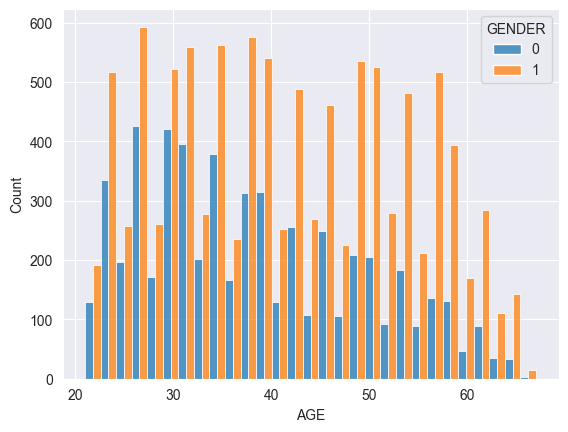

In [212]:
sns.histplot(merged_data, x="AGE", hue="GENDER", multiple="dodge")
plt.show()

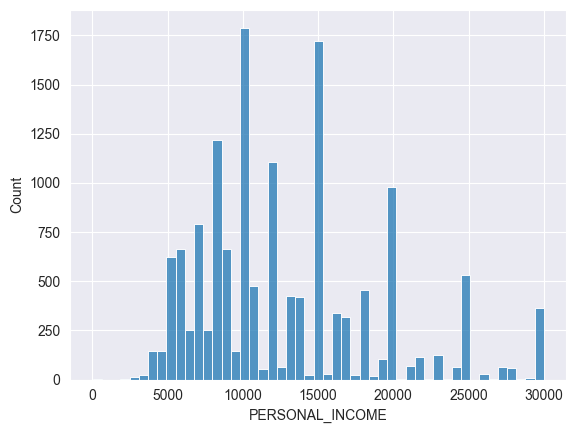

In [213]:
perc_95 = np.nanpercentile(merged_data["PERSONAL_INCOME"], 95)
merged_data["PERSONAL_INCOME"] = np.where(merged_data["PERSONAL_INCOME"] > perc_95, np.NaN,merged_data["PERSONAL_INCOME"])
sns.histplot(merged_data["PERSONAL_INCOME"])
plt.show()

<Axes: >

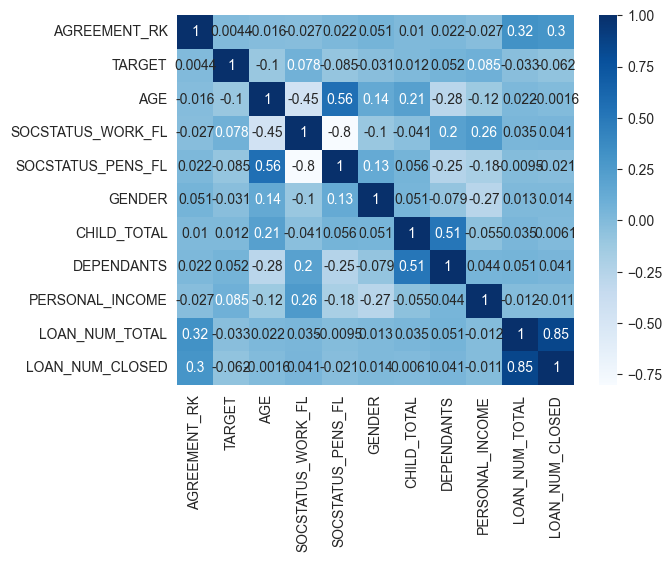

In [214]:
corr = merged_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues")

In [215]:
corr

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
AGREEMENT_RK,1.000000,0.004391,-0.015864,-0.026678,0.022101,0.051466,0.010149,0.021869,-0.026567,0.323167,0.300975
TARGET,0.004391,1.000000,-0.103868,0.078377,-0.084826,-0.030723,0.011598,0.052170,0.085165,-0.033140,-0.062475
AGE,-0.015864,-0.103868,1.000000,-0.453943,0.561089,0.140083,0.209845,-0.283761,-0.124284,0.022353,-0.001605
SOCSTATUS_WORK_FL,-0.026678,0.078377,-0.453943,1.000000,-0.800372,-0.100540,-0.040786,0.200414,0.260482,0.035049,0.041487
SOCSTATUS_PENS_FL,0.022101,-0.084826,0.561089,-0.800372,1.000000,0.130388,0.055695,-0.247422,-0.182773,-0.009511,-0.020775
GENDER,0.051466,-0.030723,0.140083,-0.100540,0.130388,1.000000,0.050549,-0.079357,-0.269656,0.012734,0.013554
CHILD_TOTAL,0.010149,0.011598,0.209845,-0.040786,0.055695,0.050549,1.000000,0.510001,-0.054737,0.035481,0.006119
DEPENDANTS,0.021869,0.052170,-0.283761,0.200414,-0.247422,-0.079357,0.510001,1.000000,0.043861,0.050815,0.040689
PERSONAL_INCOME,-0.026567,0.085165,-0.124284,0.260482,-0.182773,-0.269656,-0.054737,0.043861,1.000000,-0.012239,-0.010986
LOAN_NUM_TOTAL,0.323167,-0.033140,0.022353,0.035049,-0.009511,0.012734,0.035481,0.050815,-0.012239,1.000000,0.850305


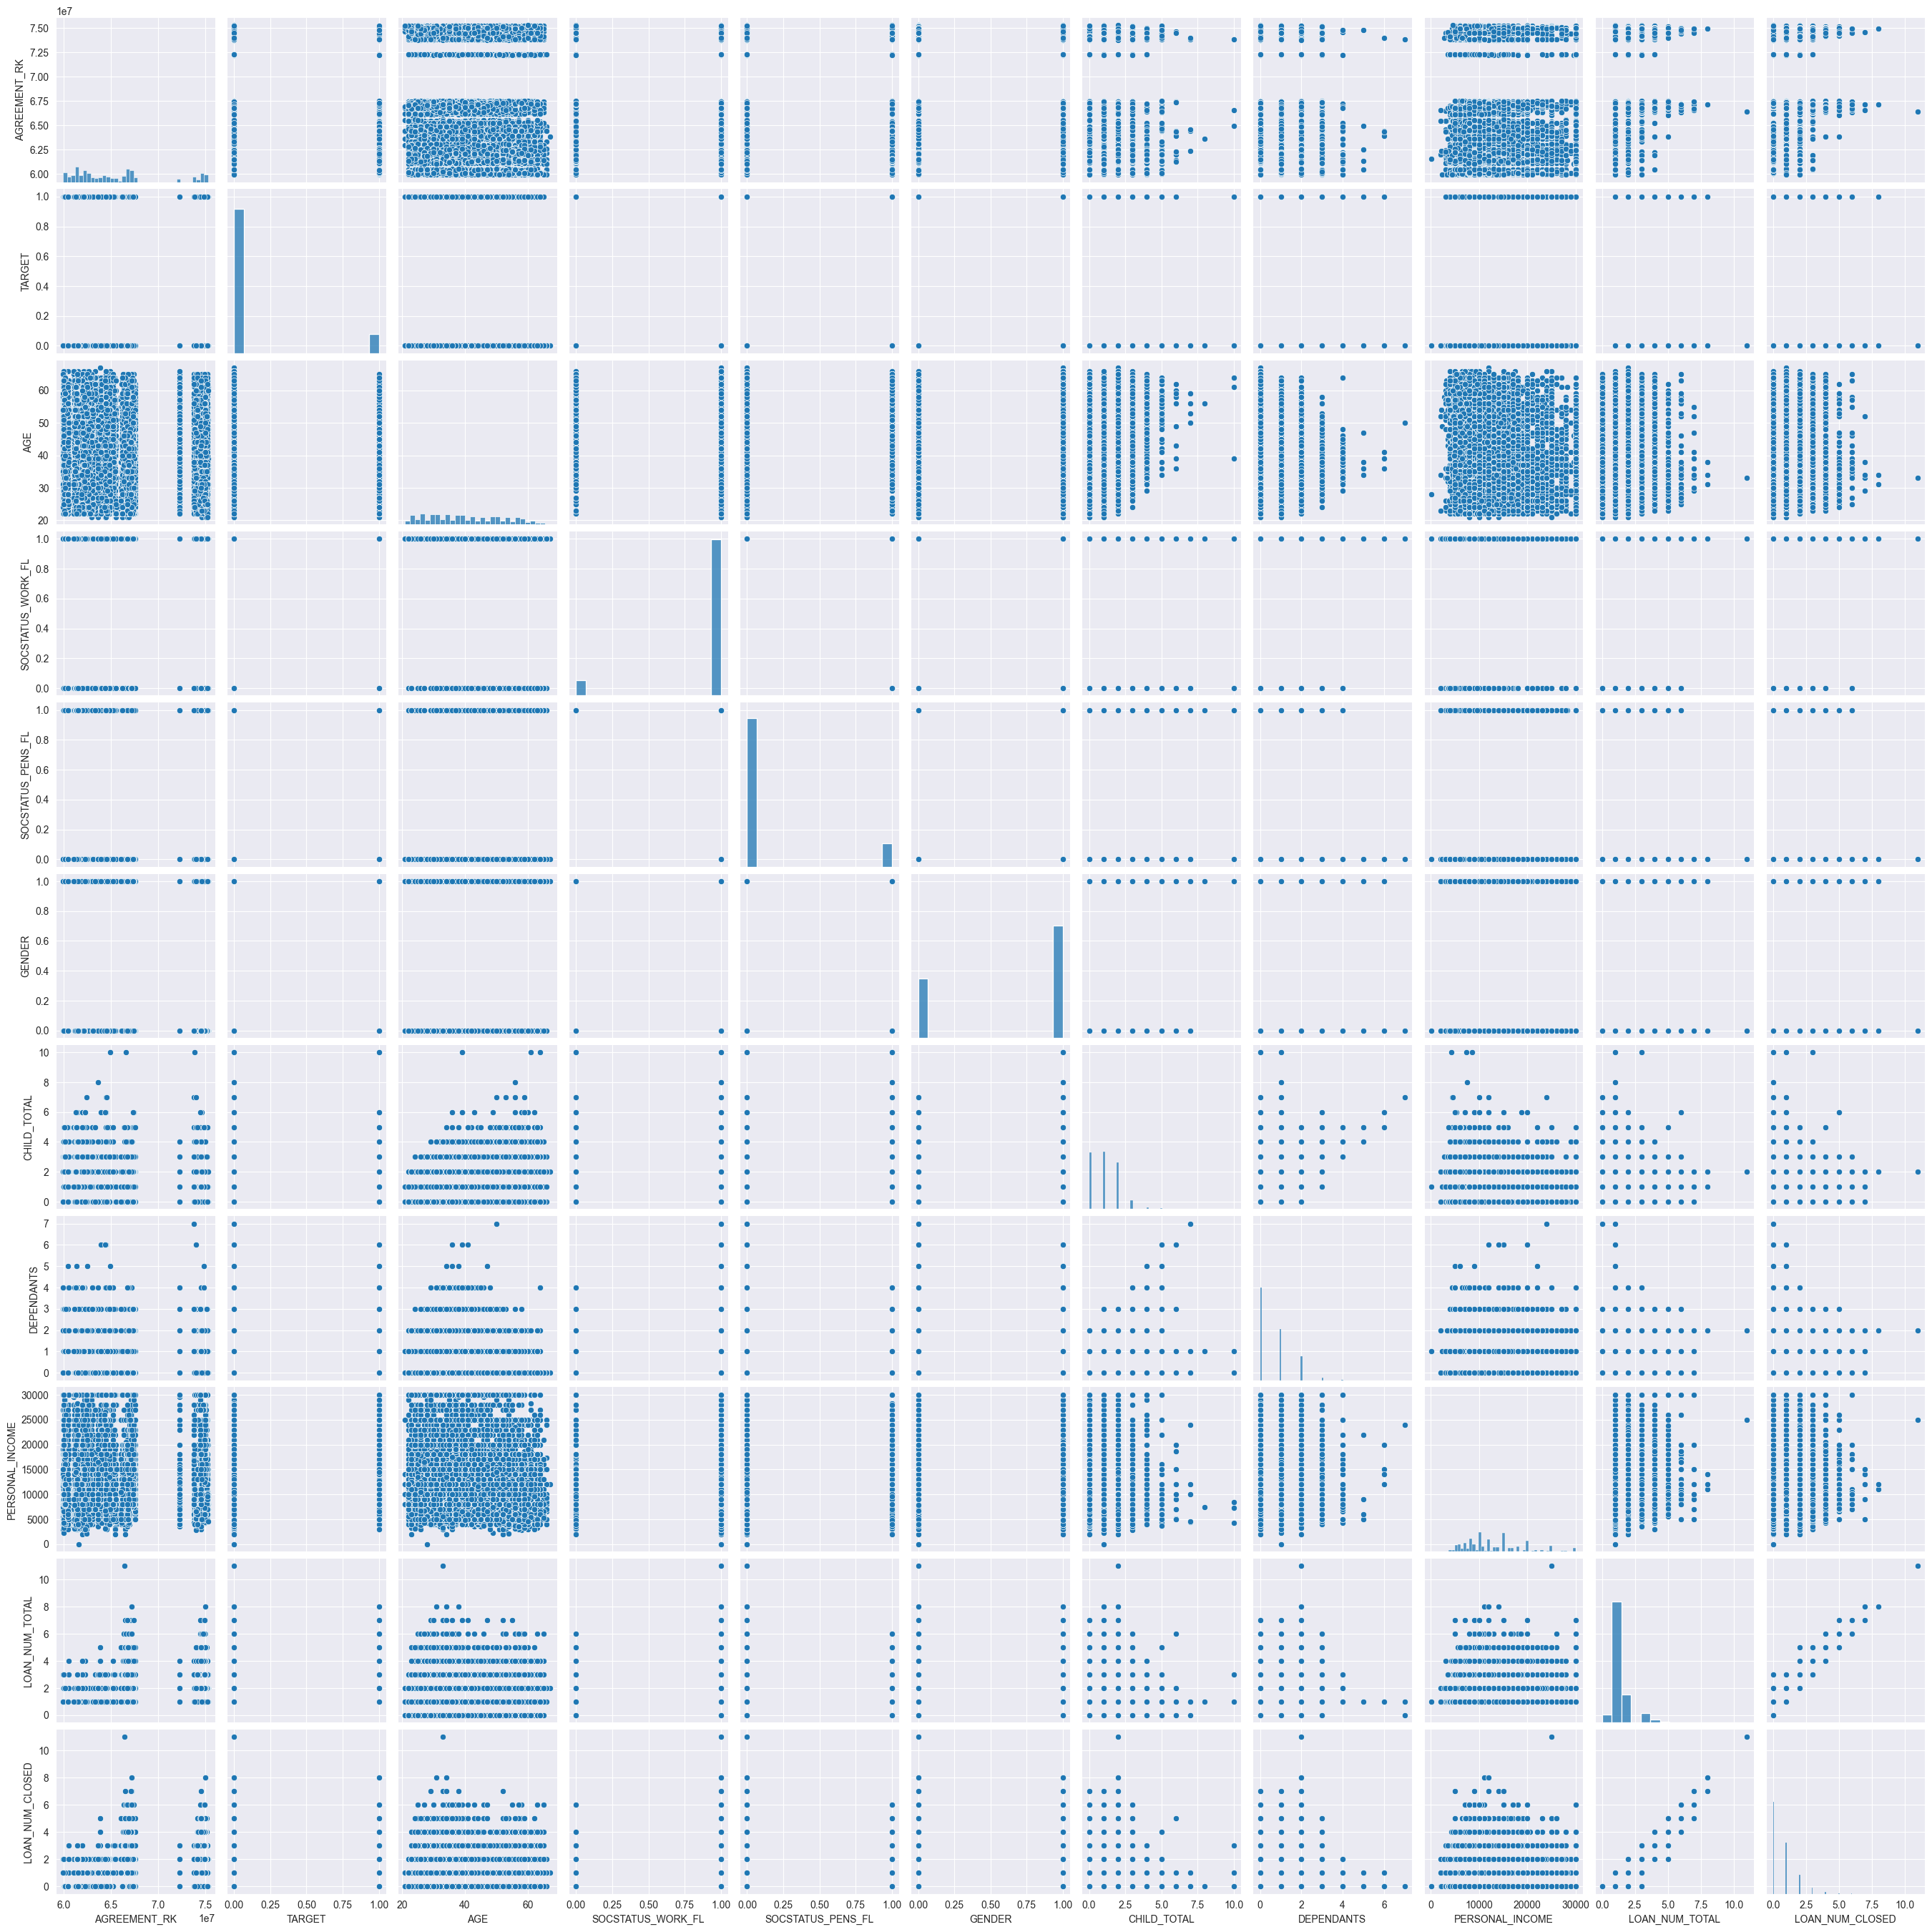

In [216]:
df_num = merged_data.select_dtypes(include=np.number)
sns.pairplot(df_num)

In [217]:
merged_data["GENDER"].replace(0, "Female", inplace=True)
merged_data["GENDER"].replace(1, "Male", inplace=True)
merged_data["SOCSTATUS_PENS_FL"].replace(0, "not_pens", inplace=True)
merged_data["SOCSTATUS_PENS_FL"].replace(1, "pens", inplace=True)
merged_data["SOCSTATUS_WORK_FL"].replace(0, "not_work", inplace=True)
merged_data["SOCSTATUS_WORK_FL"].replace(1, "work", inplace=True)

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

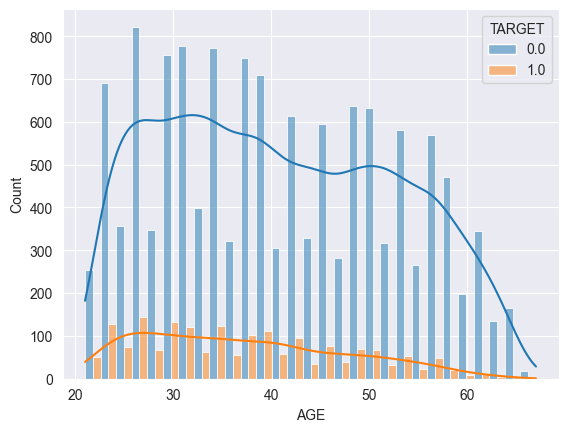

In [218]:
sns.histplot(merged_data, x="AGE", hue="TARGET", multiple="dodge", kde=True)
plt.show()

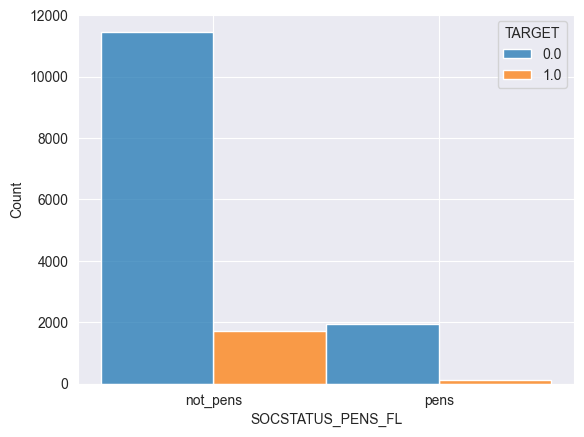

In [220]:
sns.histplot(merged_data, x="SOCSTATUS_PENS_FL", hue="TARGET", multiple="dodge")
plt.show()

In [1]:
df_num = merged_data[["AGE","CHILD_TOTAL", "DEPENDANTS", "PERSONAL_INCOME", "LOAN_NUM_TOTAL", "LOAN_NUM_CLOSED"]]
stat = df_num.describe()

NameError: name 'merged_data' is not defined